In [36]:
import os
import numpy as np
import pandas as pd
red = pd.read_csv(r'C:\\Users\\joel\\Documents\\Notebooks\\.ipynb_checkpoints\\Wine Quality dataset\\winequality-red.csv')
white = pd.read_csv(r'C:\\Users\\joel\\Documents\\Notebooks\\.ipynb_checkpoints\\Wine Quality dataset\\winequality-white.csv')
print (red.shape)
print (white.shape)

(1599, 12)
(4898, 12)


In [24]:
red.head(6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [37]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [38]:
# as mentioned in the description, both datasets have no missing values
# let's observe the datatypes of both dataframes
red.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [39]:
white.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [40]:
# let's try and remove some outliers from both datasets
for i in red.columns[:-1]:
    q25,q75 = np.percentile(red[i],[25,75])
    iqr = q75-q25
    maximum = q75+(iqr*1.5)
    minimum = q25-(iqr*1.5)
    red.loc[red[i]>maximum,i]=np.NaN
    red.loc[red[i]<minimum,i]=np.NaN
    
for i in white.columns[:-1]:
    q25,q75 = np.percentile(white[i],[25,75])
    iqr = q75-q25
    maximum = q75+(iqr*1.5)
    minimum = q25-(iqr*1.5)
    white.loc[white[i]>maximum,i]=np.NaN
    white.loc[white[i]<minimum,i]=np.NaN
    
print ((red.isnull().sum()/red.shape[0])*100) # missing values after outlier removal in red
print ((white.isnull().sum()/white.shape[0])*100) # missing values after outlier removal in white

fixed acidity           3.064415
volatile acidity        1.188243
citric acid             0.062539
residual sugar          9.693558
chlorides               7.004378
free sulfur dioxide     1.876173
total sulfur dioxide    3.439650
density                 2.814259
pH                      2.188868
sulphates               3.689806
alcohol                 0.813008
quality                 0.000000
dtype: float64
fixed acidity           2.429563
volatile acidity        3.797468
citric acid             5.512454
residual sugar          0.142915
chlorides               4.328297
free sulfur dioxide     1.020825
total sulfur dioxide    0.387913
density                 0.102082
pH                      1.531237
sulphates               2.531646
alcohol                 0.000000
quality                 0.000000
dtype: float64


In [41]:
# missing values percentage in both datasets is in an imputable range
from missingpy import KNNImputer # imputer library for python 3.5.2
# Doing KNN-imputation over the dataframe
red = pd.DataFrame(KNNImputer(n_neighbors=3, weights="uniform").fit_transform(red), columns = red.columns)
white = pd.DataFrame(KNNImputer(n_neighbors=3, weights="uniform").fit_transform(white), columns = white.columns)

print ((red.isnull().sum()/red.shape[0])*100) # missing values after KNN-imputation in red
print ((white.isnull().sum()/white.shape[0])*100) # missing values after KNN-imputation in white

C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\missingpy\utils.py:124: RuntimeWarning: invalid value encountered in sqrt
  return distances if squared else np.sqrt(distances, out=distances)


fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64
fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64


In [45]:
# what we can do as suggested in the description is we can convert target class 3-6 as 0 for Bad and classes 7-8 as 1 for Good
print (sorted(red['quality'].unique()))
print(sorted(white['quality'].unique()))

[3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
[3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]


In [46]:
red['quality'] = red['quality'].replace([3.0, 4.0, 5.0, 6.0], 0.0)
white['quality'] = white['quality'].replace([3.0, 4.0, 5.0, 6.0], 0.0)

red['quality'] = red['quality'].replace([ 7.0, 8.0], 1.0)
white['quality'] = white['quality'].replace([7.0, 8.0, 9.0], 1.0)

print (sorted(red['quality'].unique()))
print(sorted(white['quality'].unique()))

[0.0, 1.0]
[0.0, 1.0]


In [54]:
# let's observe what is the baseline accuracy/observation percentage of either wine quality
print ('Red wine quality 0: ',round((red['quality'].value_counts()[0]/red.shape[0])*100,2))
print ('Red wine quality 1: ',round((red['quality'].value_counts()[1]/red.shape[0])*100,2))
print ('\n')
print ('White wine quality 0: ',round((white['quality'].value_counts()[0]/white.shape[0])*100,2))
print ('White wine quality 1: ',round((white['quality'].value_counts()[1]/white.shape[0])*100,2))

Red wine quality 0:  86.43
Red wine quality 1:  13.57


White wine quality 0:  78.36
White wine quality 1:  21.64


fixed acidity


C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


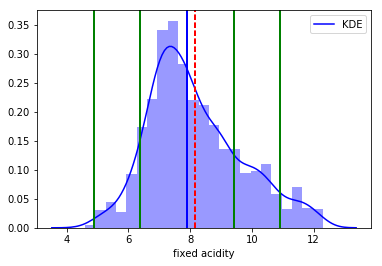




volatile acidity


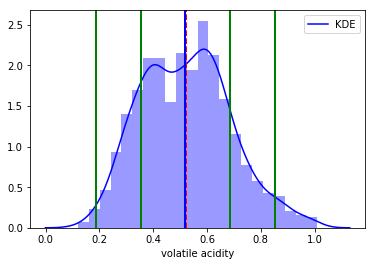




citric acid


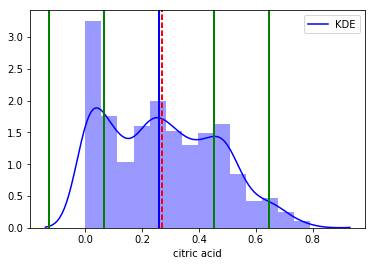




residual sugar


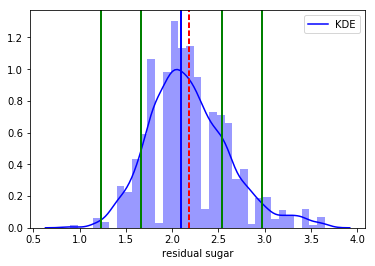




chlorides


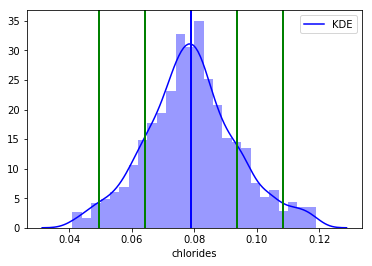




free sulfur dioxide


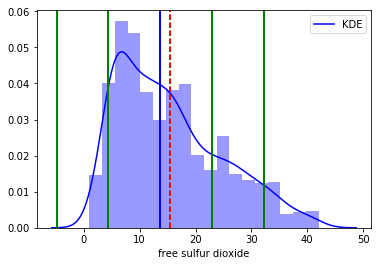




total sulfur dioxide


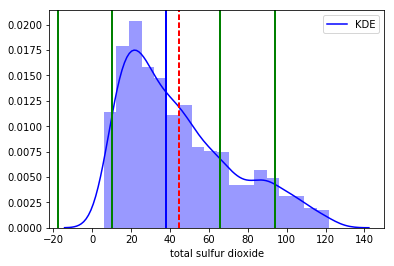




density


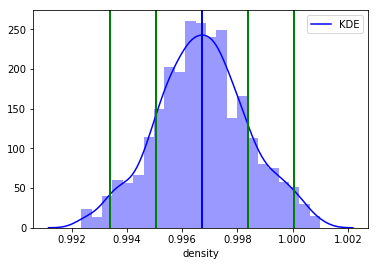




pH


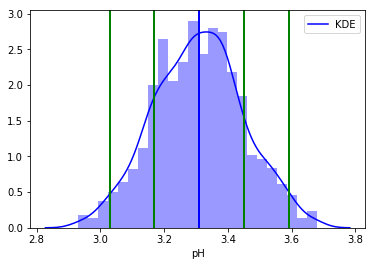




sulphates


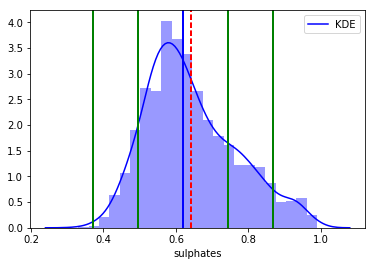




alcohol


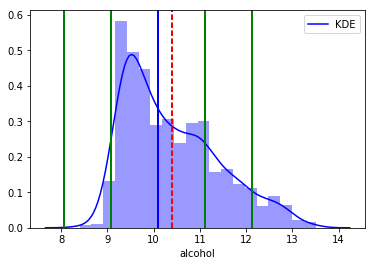

In [57]:
# let's observe some distributions of every variable individually
from matplotlib import pyplot as plt
import seaborn as sns

#lets visualize the distribution of the red wine data
for col in red.columns[:-1]:
    print (col)
    meanVal = np.mean(red[col])
    medianVal = np.median(red[col])
    stdDev = np.std(red[col])
    posDev = medianVal + stdDev
    negDev = medianVal-stdDev
    posDev2nd = medianVal + (2*stdDev)
    negDev2nd = medianVal-(2*stdDev)
    #df[col].hist()
    sns.distplot(red[col],norm_hist=True,color='blue',kde_kws={'label':'KDE'}) # histogram with the kernel-distribution line.
    plt.axvline(meanVal, color = 'r', linestyle = 'dashed', linewidth = 2) # plotting mean line
    plt.axvline(medianVal,color='b',linewidth=2) # plotting median line
    plt.axvline(posDev, color='g', linewidth=2) # plotting positive standard-deviation line
    plt.axvline(negDev, color='g', linewidth=2) # plotting negative        "         " line
    plt.axvline(posDev2nd, color='g', linewidth=2) # plotting 2nd positive standard-deviation line
    plt.axvline(negDev2nd, color='g', linewidth=2) # plotting 2nd negative        "         " line
    plt.show()
    print ('\n\n')

fixed acidity


C:\Users\joel\AppData\Local\Enthought\Canopy\edm\envs\User\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


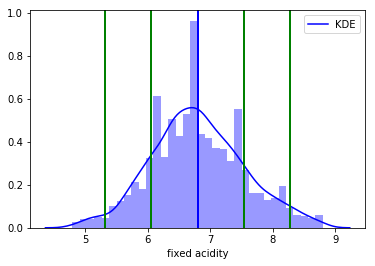




volatile acidity


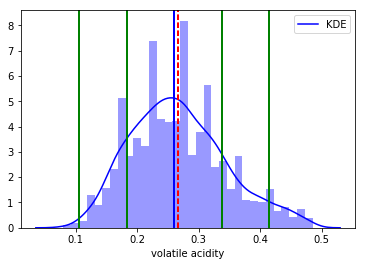




citric acid


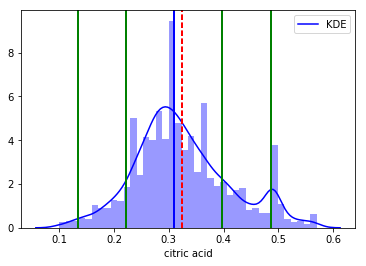




residual sugar


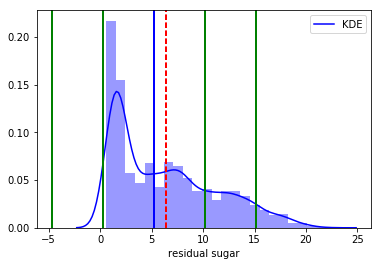




chlorides


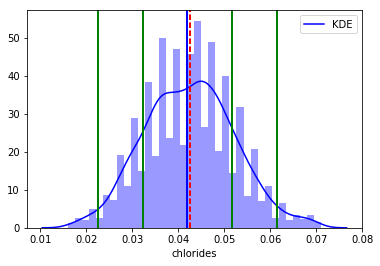




free sulfur dioxide


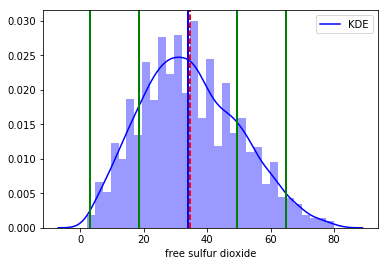




total sulfur dioxide


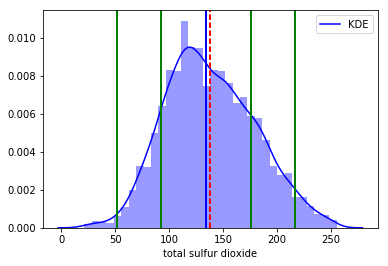




density


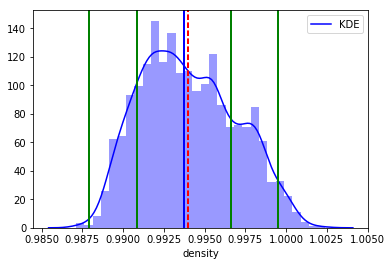




pH


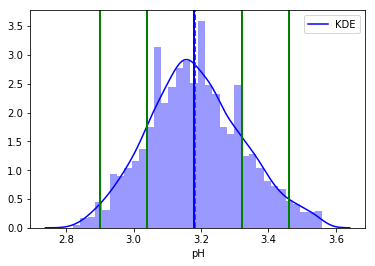




sulphates


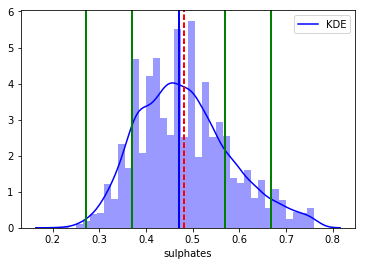




alcohol


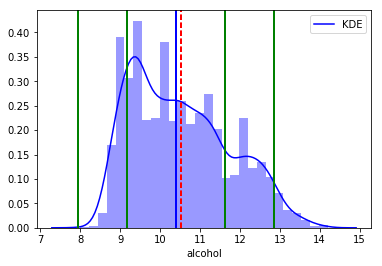

In [58]:
#lets visualize the distribution of the white wine data
for col in white.columns[:-1]:
    print (col)
    meanVal = np.mean(white[col])
    medianVal = np.median(white[col])
    stdDev = np.std(white[col])
    posDev = medianVal + stdDev
    negDev = medianVal-stdDev
    posDev2nd = medianVal + (2*stdDev)
    negDev2nd = medianVal-(2*stdDev)
    #df[col].hist()
    sns.distplot(white[col],norm_hist=True,color='blue',kde_kws={'label':'KDE'}) # histogram with the kernel-distribution line.
    plt.axvline(meanVal, color = 'r', linestyle = 'dashed', linewidth = 2) # plotting mean line
    plt.axvline(medianVal,color='b',linewidth=2) # plotting median line
    plt.axvline(posDev, color='g', linewidth=2) # plotting positive standard-deviation line
    plt.axvline(negDev, color='g', linewidth=2) # plotting negative        "         " line
    plt.axvline(posDev2nd, color='g', linewidth=2) # plotting 2nd positive standard-deviation line
    plt.axvline(negDev2nd, color='g', linewidth=2) # plotting 2nd negative        "         " line
    plt.show()
    print ('\n\n')

In [59]:
# both the dataframes show a somewhat normal distribution with their mean and median very close,
# and in some variables they coincide.
# let's normalize whichever variables aren't normalized
red_not_normal=[]
for i in red.columns:
    maximum,minimum = max(red[i]),min(red[i])
    if maximum>1 or minimum<0:
        red_not_normal.append(i)
        
white_not_normal=[]
for i in white.columns:
    maximum,minimum = max(white[i]),min(white[i])
    if maximum>1 or minimum<0:
        white_not_normal.append(i)    
        
print ('red not normal: ',red_not_normal )
print ('white not normal: ',white_not_normal)

red not normal:  ['fixed acidity', 'volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'alcohol']
white not normal:  ['fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'alcohol']


In [ ]:
print ('red normalization: ')
for i in red_not_normal:
    red[i] = (red[i]-min(red[i]))/(max(red[i])-min(red[i]))
    
    
print ('\n')
print ('white normalization: ')
for i in white_not_normal:
    white[i] = (white[i]-min(white[i]))/(max(white[i])-min(white[i]))

In [62]:
# let's do ANOVA analysis to test which continuous variables are related to the target
from scipy import stats    
white_not_related=[]

for col in white.columns[:-1]:
    fStat, pVal = stats.f_oneway(white[col], white['quality'])
    print(col,' P-value: ',pVal,' f-statistic: ',fStat)
    if pVal>0.05:
        white_not_related.append(col)
        
        
print ('white_not_related: ', white_not_related )

red_not_related=[]

for col in red.columns[:-1]:
    fStat, pVal = stats.f_oneway(red[col], red['quality'])
    print(col,' P-value: ',pVal,' f-statistic: ',fStat)
    if pVal>0.05:
        red_not_related.append(col)
        
        
        
print ('red_not_related: ', red_not_related )
# all variables of both datasets show they are related to their respective targets
# let's perform more feature selection/analysis techniques

fixed acidity  P-value:  0.0  f-statistic:  1942.393352732863
volatile acidity  P-value:  4.624314650476964e-17  f-statistic:  70.74864753003587
citric acid  P-value:  1.3853860920404705e-70  f-statistic:  320.6511570480561
residual sugar  P-value:  8.103647023386248e-15  f-statistic:  60.49912417388173
chlorides  P-value:  6.159674253483239e-184  f-statistic:  873.3426766552292
free sulfur dioxide  P-value:  9.233122946365941e-203  f-statistic:  968.0773892636556
total sulfur dioxide  P-value:  0.0  f-statistic:  1964.4772120729358
density  P-value:  1.6479857541154043e-269  f-statistic:  1310.8973619745611
pH  P-value:  0.0  f-statistic:  1801.0593969503334
sulphates  P-value:  0.0  f-statistic:  1922.6401174093623
alcohol  P-value:  6.900381130817256e-177  f-statistic:  838.0841610901768
white_not_related:  []
fixed acidity  P-value:  4.956156843326951e-207  f-statistic:  1096.7531668925121
volatile acidity  P-value:  2.5532806989957336e-198  f-statistic:  1043.2517747572892
citric 

Red wine- feature importance


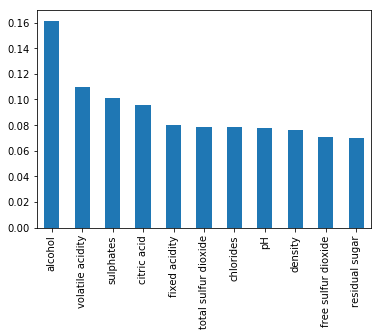

White wine - feature importance


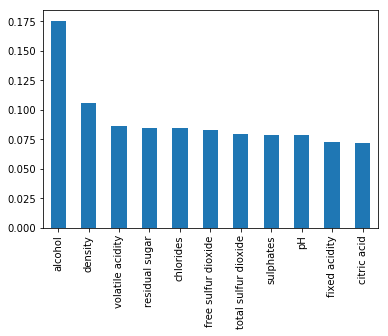

In [65]:
# let's perform two more feature selection techniques
# Let's perform a feature importance test
# this test gives you a score for each feature of your data, the higher score shows more importance/relevance 
# of that feature towards your target variable
# it uses a tree-based classifiers approach

from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier

# on the red wine dataset
redX = red.iloc[:,:-1]
redy = red['quality']
redImportances = ExtraTreesClassifier().fit(redX,redy)
#print (redImportances.feature_importances_)

# Let's look at the scores visually

print ('Red wine- feature importance')
redValues = pd.Series(redImportances.feature_importances_, index = red.columns[:-1])
redValues.nlargest(red.shape[1]-1).plot(kind='bar')
plt.figsize=(10,15)
plt.show()

# on the white wine dataset
whiteX = white.iloc[:,:-1]
whitey = white['quality']
whiteImportances = ExtraTreesClassifier().fit(whiteX,whitey)
#print (whiteImportances.feature_importances_)

# Let's look at the scores visually

print ('White wine - feature importance')
whiteValues = pd.Series(whiteImportances.feature_importances_, index = white.columns[:-1])
whiteValues.nlargest(white.shape[1]-1).plot(kind='bar')
plt.figsize=(10,15)
plt.show()
# in both red and white wine alchohol shows highest importance
# let's perform lasso/logistic regression's and random-forest classification's feature importance/selction techniques
# and then decide also considering this test, which variables to keep

In [75]:
# let's perform both tests on red wine first
# source: https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499
from sklearn.linear_model import Lasso, LogisticRegression # Lasso is L1 regularization
from sklearn.feature_selection import SelectFromModel

# fitting the feature selection model with the Logistic regression data
X = red.iloc[:,:-1]
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(X, red['quality'])


# Visualising features that were kept by the lasso regularisation
print (sel_.get_support())

#  So True is for the features that lasso thought is important (non-zero features) 
# while False is for the features whose weights were shrinked to zero and are not important according to Lasso.


selected_feat = X.columns[(sel_.get_support())] # gives the remaining features

print ('lasso-logistic features selected for Red Wine: ')
print (selected_feat)
print ('lasso test\'s not important Red Wine features: ')
print ([i for i in red.columns[:-1] if i not in selected_feat])
print ('\n')


from sklearn.ensemble import RandomForestClassifier
sel_ = SelectFromModel(RandomForestClassifier())

sel_.fit(X, red['quality'])

# Visualising features that were kept by the lasso regularisation
print (sel_.get_support())
selected_feat = X.columns[(sel_.get_support())] # gives the remaining features
print ('Random-forest based features selected for Red Wine: ')
print (selected_feat)
print ('Random forest\'s not important features: ')
print ([c for c in red.columns[:-1] if c not in selected_feat])
# in feature importance,lasso/logistic and Random-Forest feature selection we see citric acid as 
# the most commonly suggested and unimportant variable
# so we'll apply one or two ML models with and without this variable to check whther it was causing overfitting or not


[False  True False  True False False  True  True  True  True  True]
lasso-logistic features selected for Red Wine: 
Index(['volatile acidity', 'residual sugar', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')
lasso test's not important Red Wine features: 
['fixed acidity', 'citric acid', 'chlorides', 'free sulfur dioxide']


[ True  True False False False False False  True False  True  True]
Random-forest based features selected for Red Wine: 
Index(['fixed acidity', 'volatile acidity', 'density', 'sulphates', 'alcohol'], dtype='object')
Random forest's not important features: 
['citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH']


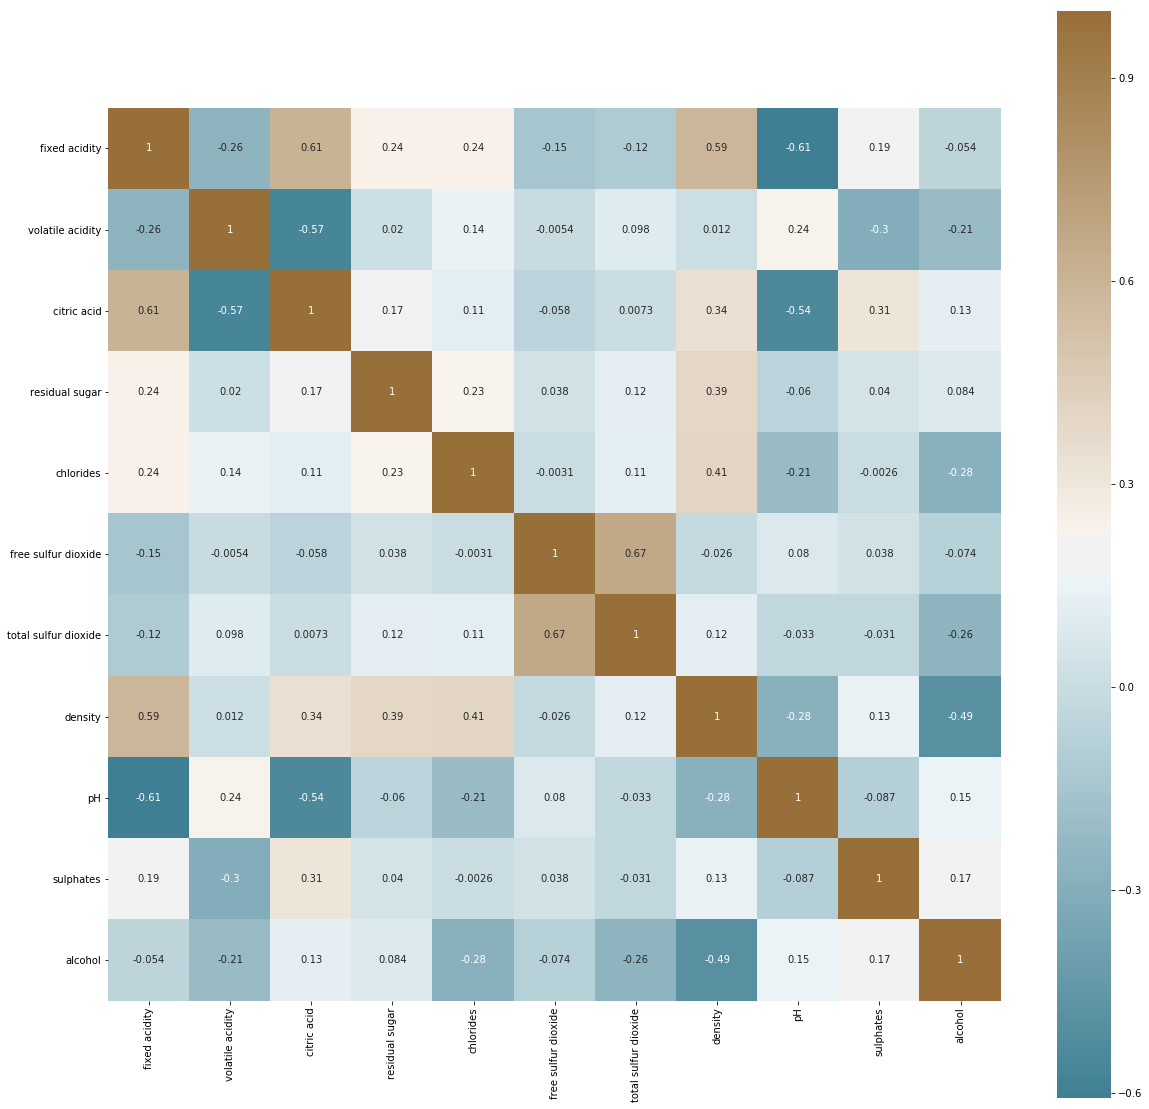

In [76]:
corr =red[red.columns[:-1]].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax,annot = True)
plt.show()
# there are no highly collinear continuous variables in Red wine dataset

In [78]:
red2 = red[[i for i in red.columns if i!='citric acid']] # a new red wine dataframe without 'citric acid' variable
red2.columns

Index(['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [79]:
# let's perform both tests on red wine first
# source: https://towardsdatascience.com/feature-selection-using-regularisation-a3678b71e499
from sklearn.linear_model import Lasso, LogisticRegression # Lasso is L1 regularization
from sklearn.feature_selection import SelectFromModel

# fitting the feature selection model with the Logistic regression data
X = white.iloc[:,:-1]
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(X, white['quality'])


# Visualising features that were kept by the lasso regularisation
print (sel_.get_support())

#  So True is for the features that lasso thought is important (non-zero features) 
# while False is for the features whose weights were shrinked to zero and are not important according to Lasso.


selected_feat = X.columns[(sel_.get_support())] # gives the remaining features

print ('lasso-logistic features selected for white Wine: ')
print (selected_feat)
print ('lasso test\'s not important white Wine features: ')
print ([i for i in white.columns[:-1] if i not in selected_feat])
print ('\n')


from sklearn.ensemble import RandomForestClassifier
sel_ = SelectFromModel(RandomForestClassifier())

sel_.fit(X, white['quality'])

# Visualising features that were kept by the lasso regularisation
print (sel_.get_support())
selected_feat = X.columns[(sel_.get_support())] # gives the remaining features
print ('Random-forest based features selected for white Wine: ')
print (selected_feat)
print ('Random forest\'s not important features: ')
print ([c for c in white.columns[:-1] if c not in selected_feat])
# in feature importance,lasso/logistic and Random-Forest feature selection we see citric acid as 
# the most commonly suggested and unimportant variable
# so we'll apply one or two ML models with and without this variable to check whther it was causing overfitting or not

[ True  True False  True False  True  True  True  True  True  True]
lasso-logistic features selected for white Wine: 
Index(['fixed acidity', 'volatile acidity', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol'],
      dtype='object')
lasso test's not important white Wine features: 
['citric acid', 'chlorides']


[False False False False False False False  True False False  True]
Random-forest based features selected for white Wine: 
Index(['density', 'alcohol'], dtype='object')
Random forest's not important features: 
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates']


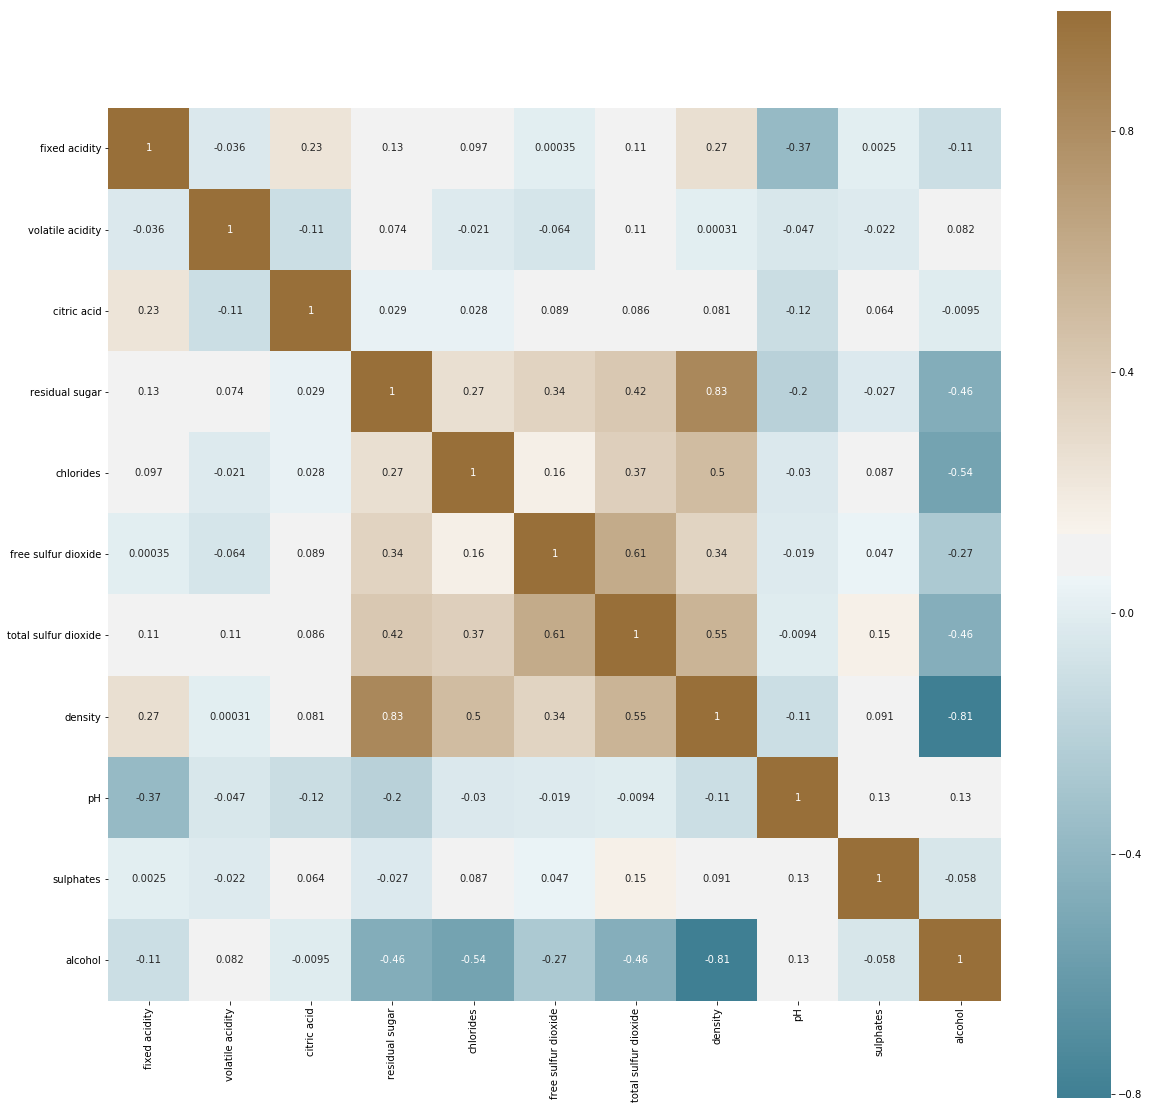

In [81]:
corr =white[white.columns[:-1]].corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 50, as_cmap=True),
            square=True, ax=ax,annot = True)
plt.show()
# there are no highly collinear continuous variables in Red wine dataset

In [82]:
# density and residual sugar are highly correlated with the alchohol which is the highest predictor
# density and residual sugar are also one of the 4 highest predictors of the target, 
# but we can still afford to remove them from the dataframe as there are other variables as well
white.drop(labels = ['density','residual sugar'],axis=1,inplace=True)
print (white.columns)
print ('\n')
# citric acid is the least important variable in sklearn's feature import bargraph 
# and the lasso/logistic and Random forest feature importance
# so is chlorides but it lies somehwere in the middle in sklearn's feature import bargraph, so we won't touch that
# so we'll apply one or two ML models with and without this variable to check whther it was causing overfitting or not

white2 = white[[i for i in white.columns if i!='citric acid']] # a new white wine dataframe without 'citric acid' variable
print (white2.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates',
       'alcohol', 'quality'],
      dtype='object')


Index(['fixed acidity', 'volatile acidity', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [85]:
# let's ML begin model development
# lets begin now with the splitting of data into training and testing
from sklearn.cross_validation import train_test_split

# red wine data split
X_train,X_test,Y_train,Y_test = train_test_split(red.iloc[:,:-1],red.iloc[:,-1]) # red split
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(red2.iloc[:,:-1],red2.iloc[:,-1]) # red2 split


from sklearn.metrics import accuracy_score

def error_metrics(y_test,Y_preds):
    cm =pd.crosstab(y_test,Y_preds)
    TN = cm.iloc[0,0]
    FP = cm.iloc[0,1]
    FN = cm.iloc[1,0]
    TP = cm.iloc[1,1]
    print ('FNR: ',(FN/(FN+TP))*100)
    print ('accuracy: ',round(accuracy_score(y_test,Y_preds)*100,2))

In [86]:
from sklearn.linear_model import LogisticRegression

# original red
LR =  LogisticRegression().fit(X_train,Y_train)
LR_preds = LR.predict(X_test)
error_metrics(Y_test,LR_preds)

# red2
LR2 =  LogisticRegression().fit(X_train2,Y_train2)
LR_preds2 = LR2.predict(X_test2)
error_metrics(Y_test2,LR_preds2)

FNR:  87.03703703703704
accuracy:  86.5
FNR:  73.07692307692307
accuracy:  89.0


In [87]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier().fit(X_train,Y_train)
DT_preds = DT_model.predict(X_test)
error_metrics(Y_test,DT_preds)

DT_model2 = DecisionTreeClassifier().fit(X_train2,Y_train2)
DT_preds2 = DT_model2.predict(X_test2)
error_metrics(Y_test2,DT_preds2)

FNR:  48.148148148148145
accuracy:  85.5
FNR:  53.84615384615385
accuracy:  86.25


In [88]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB().fit(X_train,Y_train)
NB_preds = NB_model.predict(X_test)
error_metrics(Y_test,NB_preds)

NB_model2 = GaussianNB().fit(X_train2,Y_train2)
NB_preds2 = NB_model2.predict(X_test2)
error_metrics(Y_test2,NB_preds2)

FNR:  48.148148148148145
accuracy:  83.5
FNR:  46.15384615384615
accuracy:  85.5


In [89]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier().fit(X_train,Y_train)
RF_preds = RF_model.predict(X_test)
error_metrics(Y_test,RF_preds)

RF_model2 = RandomForestClassifier().fit(X_train2,Y_train2)
RF_preds2 = RF_model2.predict(X_test2)
error_metrics(Y_test2,RF_preds2)

FNR:  74.07407407407408
accuracy:  88.25
FNR:  63.46153846153846
accuracy:  89.75


In [90]:
# in all of the models except in Decision trees, red2 dataset had a lower FNR
# but higher accuracy in all models
# we'll use red2 for further models even for deep-learning
from sklearn.neighbors import KNeighborsClassifier
K_model2 = KNeighborsClassifier(n_neighbors=5).fit(X_train2,Y_train2)
K_preds2 = K_model2.predict(X_test2)
error_metrics(Y_test2,K_preds2)

FNR:  50.0
accuracy:  88.25


In [92]:
red2.shape

(1599, 11)

In [95]:
# import the necessary modules for DNN
from keras.models import Sequential
from keras.layers import Dense, Activation

# define the DNN model
model = Sequential()
model.add(Dense(16, input_dim=10,activation = "relu")) # 10 input features, close to 2 x neurons in 1st hidden layer: 16
#model.add(Dense(32,activation = "relu"))
model.add(Dense(16,activation = "relu"))
model.add(Dense(1,activation = "sigmoid")) # because the target is binary classification
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# split the data for training and validation
train_data,test_data,train_targets,test_targets = train_test_split(red2.iloc[:,:-1],red2['quality'],test_size=0.3,random_state=42)
ptrain_data ,x_val,ptrain_targets,y_val = train_test_split(train_data,train_targets,test_size=0.2,random_state=42)#validation data
print (ptrain_data.shape ,ptrain_targets.shape)
print (x_val.shape,y_val.shape)

(895, 10) (895,)
(224, 10) (224,)


Train on 895 samples, validate on 224 samples
Epoch 1/60
895/895 [==============================] - 1s 1ms/step - loss: 0.3184 - acc: 0.8972 - val_loss: 0.4240 - val_acc: 0.8527

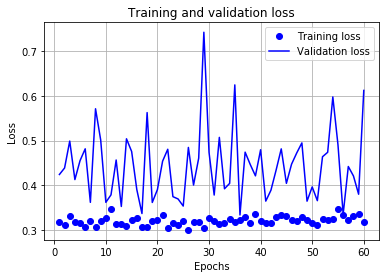

In [112]:
history = model.fit(ptrain_data,ptrain_targets,batch_size=1,epochs=60,validation_data=(x_val, y_val))

preds = model.predict(test_data)
test_results = model.evaluate(test_data,test_targets)
for i in range(len(test_results)):
    print (model.metrics_names[i],': ',test_results[i])

preds = [round(i[0]) for i in preds]
error_metrics(test_targets,np.array(preds))

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# with 60 epochs
#loss :  0.5163050626715024
#acc :  0.8666666666666667
#FNR:  71.64179104477611
#accuracy:  86.67

# with 50 epochs
#loss :  0.34336135983467103
#acc :  0.8395833333333333
#FNR:  49.25373134328358
#accuracy:  83.96

# with 40 epochs
#loss :  0.4435269514719645
#acc :  0.8645833333333334
#FNR:  71.64179104477611
#accuracy:  86.46

# with 30 epochs
#loss :  0.39891253113746644
#acc :  0.8375
#FNR:  52.23880597014925
#accuracy:  83.75

# with 20 epochs
#loss :  0.4109509458144506
#acc :  0.8375
#FNR:  61.19402985074627
#accuracy:  83.75

# with 10 epochs
#loss :  0.3812113881111145
#acc :  0.8604166666666667
#FNR:  71.64179104477611
#accuracy:  86.04

# the most suitable epoch number is 50 because of FNR:  49.25 % and accuracy:  83.96 %

In [114]:
# white wine data split

X_train,X_test,Y_train,Y_test = train_test_split(white.iloc[:,:-1],white.iloc[:,-1]) # white split
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(white2.iloc[:,:-1],white2.iloc[:,-1]) # white2 split

from sklearn.linear_model import LogisticRegression

# original red
LR =  LogisticRegression().fit(X_train,Y_train)
LR_preds = LR.predict(X_test)
error_metrics(Y_test,LR_preds)

# red2
LR2 =  LogisticRegression().fit(X_train2,Y_train2)
LR_preds2 = LR2.predict(X_test2)
error_metrics(Y_test2,LR_preds2)


FNR:  77.53623188405797
accuracy:  78.86
FNR:  74.235807860262
accuracy:  83.27


In [115]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier().fit(X_train,Y_train)
DT_preds = DT_model.predict(X_test)
error_metrics(Y_test,DT_preds)

DT_model2 = DecisionTreeClassifier().fit(X_train2,Y_train2)
DT_preds2 = DT_model2.predict(X_test2)
error_metrics(Y_test2,DT_preds2)

FNR:  44.20289855072464
accuracy:  82.86
FNR:  34.49781659388647
accuracy:  83.67


In [116]:
from sklearn.naive_bayes import GaussianNB

NB_model = GaussianNB().fit(X_train,Y_train)
NB_preds = NB_model.predict(X_test)
error_metrics(Y_test,NB_preds)

NB_model2 = GaussianNB().fit(X_train2,Y_train2)
NB_preds2 = NB_model2.predict(X_test2)
error_metrics(Y_test2,NB_preds2)

FNR:  49.63768115942029
accuracy:  76.16
FNR:  43.23144104803494
accuracy:  80.98


In [117]:
# here too in white wine, the 2nd dataset white2 has a better accuracy and lower FNR in all models applied to it
# we'll use white2 dataset from here even for deep-learning
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier().fit(X_train,Y_train)
RF_preds = RF_model.predict(X_test)
error_metrics(Y_test,RF_preds)

RF_model2 = RandomForestClassifier().fit(X_train2,Y_train2)
RF_preds2 = RF_model2.predict(X_test2)
error_metrics(Y_test2,RF_preds2)

FNR:  51.81159420289855
accuracy:  85.31
FNR:  44.10480349344978
accuracy:  88.9


In [118]:
from sklearn.neighbors import KNeighborsClassifier
K_model2 = KNeighborsClassifier(n_neighbors=5).fit(X_train2,Y_train2)
K_preds2 = K_model2.predict(X_test2)
error_metrics(Y_test2,K_preds2)

FNR:  48.90829694323144
accuracy:  84.08


In [119]:
white2.shape

(4898, 9)

In [ ]:
# define the DNN model according to the white2 dataset
model = Sequential()
model.add(Dense(32, input_dim=9,activation = "relu")) # 9 input features,2 x (number of neurons):32 in 1st hidden layer
#model.add(Dense(32,activation = "relu"))
model.add(Dense(16,activation = "relu"))
model.add(Dense(1,activation = "sigmoid")) # because the target is binary classification
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

# split the data for training and validation
train_data,test_data,train_targets,test_targets = train_test_split(white2.iloc[:,:-1],white2['quality'],test_size=0.3,random_state=42)
ptrain_data ,x_val,ptrain_targets,y_val = train_test_split(train_data,train_targets,test_size=0.2,random_state=42)#validation data
print (ptrain_data.shape ,ptrain_targets.shape)
print (x_val.shape,y_val.shape)

Train on 895 samples, validate on 224 samples
Epoch 1/50
895/895 [==============================] - 4s 5ms/step - loss: 0.3362 - acc: 0.9039 - val_loss: 0.4674 - val_acc: 0.8393

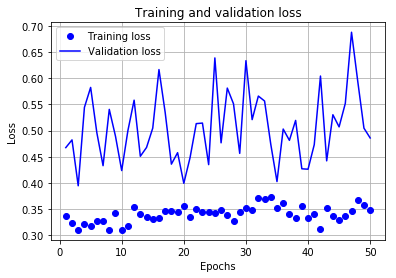

In [125]:
history = model.fit(ptrain_data,ptrain_targets,batch_size=1,epochs=50,validation_data=(x_val, y_val))
preds = model.predict(test_data)
test_results = model.evaluate(test_data,test_targets)

# print the error metrics
for i in range(len(test_results)):
    print (model.metrics_names[i],': ',test_results[i])
preds = [round(i[0]) for i in preds]
error_metrics(test_targets,np.array(preds))

# plot the graph necessary to show (training and validation loss) vs epochs progress
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# with 10 epochs            
#loss :  0.5017555966973305
#acc :  0.8645833333333334
#FNR:  71.64179104477611
#accuracy:  86.46

# with 20 epochs
#loss :  0.42483343929052353
#acc :  0.8645833333333334
#FNR:  89.55223880597015
#accuracy:  86.46

# with 30 epochs
#loss :  0.4969649357100328
#acc :  0.8645833333333334
#FNR:  79.1044776119403
#accuracy:  86.46

# with 40 epochs
# loss :  0.5344130958120028
#acc :  0.85625
#FNR:  70.1492537313433
#accuracy:  85.62

# with 50 epochs
# loss :  0.4729257494211197
#acc :  0.8604166666666667
#FNR:  73.13432835820896
#accuracy:  86.04

# the suitable epoch number among these would be 40 epochs with FNR:  70.14 % and accuracy:  85.62 %

In [ ]:
#--------------------------------------Red Wine -  CONCLUSION --------------------------------#
         DNN        KNN      Random-Forest  Naive-Bayes  Decision-Trees  Logistic-Regression
#acc :  83.95 %    88.25 %   89.75 %         85.5 %        86.25 %         89.0 %
#FNR:   49.25 %    50.0 %    63.46 %         46.15 %       53.84 %         73.07 %

# the most suitable ML model would be Naive-Bayes with lowest FNR 46.15 %
# and the accuracy (85.5 % ) with somewhere in the middle compared to rest ML models

In [ ]:
#--------------------------------------White wine- CONCLUSION---------------------------------------------------#

        logistic-regression  Decision-Trees  Naive-Bayes  Random-Forest     KNN     DNN
FNR:       74.23 %            34.49 %          43.23 %     63.46 %         48.90   70.14 %
accuracy:  83.27 %            83.67 %          80.98 %     89.75 %         84.08   85.62 %
    
# the suitable model for White wine dataset would be Decision-Trees with lowest FNR 34.9% 
# but with a somewhat decent accuracy( 83.67% which is little, but not much, low than other ML models)